# The Final Project for Scientific Python
<br>
by Shynar Akhmetova
<br>

Central European University, Winter 2022-2023
<br>

**Research question**: What are the potential factors (i.e., product qualities) that drive the customer behavior and define the brand's success in terms of innerwear sales for the period of June 2017 to July 2017?
<br>

**Used datasets**: amazon_com.csv & others from [this website](https://www.kaggle.com/datasets/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others)
<br>

**Analyzed relationships**:
<br>
(1) The relationship between *pricing* and sales of innerwear items
<br>
(2) The relationship between *rating* and sales of innerwear items
<br>
(3) The most successful *brand* in terms of sales of innerwear items
<br>
(4) The most successful *color* in terms of sales of innerwear items
<br>
(5) The most successful *retail platform* in terms of sales of innerwear items
<br>
(6) The multiple regression of rating on rating, brand, and color

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# (1) The effect of pricing

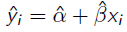
This formula represents linear regression where
<br>
*$y_{i}$* represents estimated sales for onservation *i*
<br>
*α* - estimated intercept coefficient
<br>
*β* - estimated price coefficient
<br>
*$x_{i}$* - x value for observation *i*

In [2]:
#loading data from csv file to the dataframe
amazon_df = pd.read_csv('amazon_com.csv')
amazon_df

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,$32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,$36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,Wacoal Women's Red Carpet Strapless Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B01CEBGODE?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,806,"[ 91% Nylon, 9% Spandex , Imported , Hand Wash...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
31608,Wacoal Women's Underwire Sport Bra,$65.00,$54.50,https://www.amazon.com/-/dp/B01GTNW0TA?th=1&psc=1,Wacoal,Bras,Amazon US,"Sport bra offers great control, support and co...",4.3,1846,"[ 80% Nylon/ 20% Spandex/Elastane , Imported ,...","32C , 32D , 32DD , 32DDD , 32G , 32H , 34C , 3...","32C , 32D , 32DD , 32G , 32H , 34C , 34D , 34D...",Teaberry/Gray
31609,Wacoal Women's Retro Chic Underwire Bra,$60.00,$60.00,https://www.amazon.com/-/dp/B01N6KT7XE?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,4.4,753,"[ Lace: 100% Nylon; Back: 82% Nylon, 18% Spand...","30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...",Violet Tulip
31610,Wacoal Women's Halo Underwire Bra,$48.00,$48.00,https://www.amazon.com/-/dp/B00SJ6UBTC?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful all over cross-dye soft lace cups an...,4.4,379,"[ 82% Nylon, 18% Spandex , Imported , Hook and...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...",Ivory


In [3]:
#converting price values to the appropriate format
amazon_df['price'] = amazon_df['price'].str.replace('$','')
pd.to_numeric(amazon_df['price'], downcast='integer')

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\1871199345.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon_df['price'] = amazon_df['price'].str.replace('$','')


0        32.40
1        27.00
2        65.00
3        36.00
4        65.00
         ...  
31607    65.00
31608    54.50
31609    60.00
31610    48.00
31611    43.06
Name: price, Length: 31612, dtype: float64

In [4]:
#creating a separate dataframe containing product name, its price, and its sales
sales_price = amazon_df.groupby(['product_name', 'price']).size().reset_index(name='sales')
sales_price

,product_name,price,sales
0,Calvin Klein Underwear Women's Carousel 3 Pack...,33.00,46
1,Calvin Klein Women's 3 Pack Carousel Thong Panty,19.99,2
2,Calvin Klein Women's 3 Pack Carousel Thong Panty,20.99,10
3,Calvin Klein Women's 3 Pack Carousel Thong Panty,22.99,4
4,Calvin Klein Women's 3 Pack Carousel Thong Panty,23.10,2
...,...,...,...
2599,b.tempt'd by Wacoal Womens Ciao Bella Tanga Panty,17.49,10
2600,b.tempt'd by Wacoal Womens Ciao Bella Tanga Panty,17.89,1
2601,b.tempt'd by Wacoal Womens Ciao Bella Tanga Panty,18.27,4
2602,b.tempt'd by Wacoal Womens Ciao Bella Tanga Panty,18.99,14


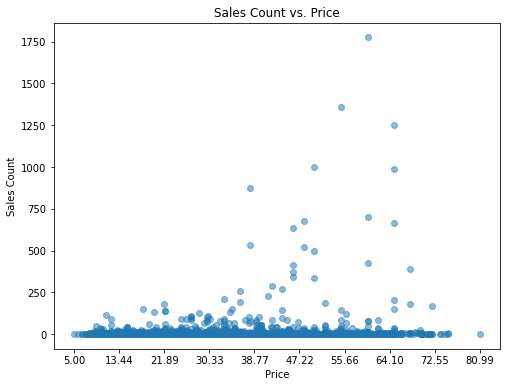

In [5]:
#visualizing data for the preliminary analysis using the scatter plot
plt.figure(figsize=(8, 6))
sales_price['price'] = sales_price['price'].astype(float)
unique_prices = sales_price['price'].unique()
tick_positions = np.linspace(min(unique_prices), max(unique_prices), 10)
plt.scatter(sales_price['price'],sales_price['sales'], alpha=0.5)
plt.xticks(tick_positions)
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.title('Sales Count vs. Price');

In [6]:
#performing the linear regression analysis
slope_lin_p, intercept_lin_p, r_value_lin_p, p_value_lin_p, std_err_lin_p = stats.linregress(sales_price['price'], sales_price['sales'])

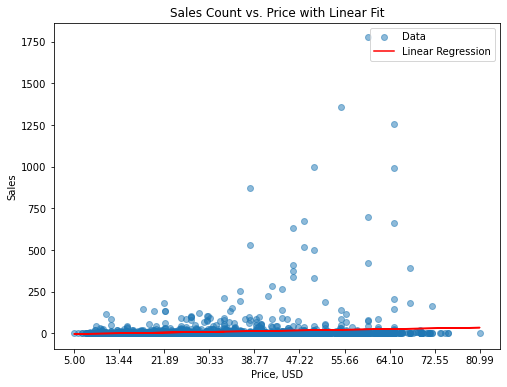

In [7]:
#plotting the linear fit against the data
plt.figure(figsize=(8, 6))
plt.scatter(sales_price['price'], sales_price['sales'], label='Data', alpha=0.5)
plt.plot(sales_price['price'], slope_lin_p*sales_price['price']+intercept_lin_p, color='red', label='Linear Regression')
plt.xticks(tick_positions)
plt.xlabel('Price, USD')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Count vs. Price with Linear Fit');

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm

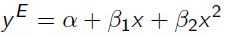
This formula represents quadratic polynomial regression where
<br>
*$y^{E}$* stands for estimated sales
<br>
*α* - estimated intercept coefficient
<br>
*$β_{1}$* - estimated coefficient for x (no meaning)
<br>
*$β_{2}$* - estimated price coefficient

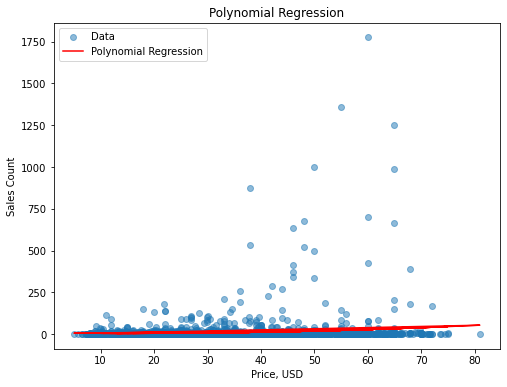

In [9]:
#performing the polynomial regression analysis
X = sales_price['price'].values.reshape(-1, 1) #independent variable
y = sales_price['sales'].values #dependent variable

degree = 2 #quadratic polynomial regression

#generating polynomial features from the independent variable
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
#fitting a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
#generating predicted values of the dependent variable
y_pred = poly_reg.predict(X_poly)

#visualizing the polynomial regression against the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Price, USD')
plt.ylabel('Sales Count')
plt.legend()
plt.title('Polynomial Regression');

In [10]:
#calculating polynomial regression coefficients, intercept, R-squared, standard errors, and p-value
coefficients_pol_p = poly_reg.coef_
intercept_pol_p = poly_reg.intercept_
r_squared_pol_p = r2_score(y, y_pred)
X_poly_with_constant = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly_with_constant).fit()
p_value_pol_p = model.pvalues[-1]
std_err_poly_p = model.bse

In [11]:
#comparing results from two regression models in the dataframe
results_price = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Intercept': [intercept_lin_p, intercept_pol_p],
    'Coefficient': [slope_lin_p, coefficients_pol_p[-1]],
    'R-squared': [r_value_lin_p**2, r_squared_pol_p],
    'Standard Error': [std_err_lin_p, std_err_poly_p[-1]],
    'P-value': [p_value_lin_p, p_value_pol_p],
})

In [12]:
results_price

,Model,Intercept,Coefficient,R-squared,Standard Error,P-value
0,Linear Regression,-5.545838,0.504063,0.010798,0.094580,1.069304e-07
1,Polynomial Regression,7.188447,0.010889,0.012283,0.005507,4.813690e-02


According to this analysis, both linear and quadratic regressions produce statistically significant coefficients, meaning that there is a possible correlation between price and corresponding sales. However, the polynomial regression seems to possess better R-squared, although slightly, i.e., 1.23% of variation within the data is explained by this regression.

If we chose the the quadratic regression model, the interpretation of the coefficient would look like this:
<br>
*Sales are expected to be higher by approximately 0.01 unit, on average, for every $1 increase in price.*

# (2) The effect of rating

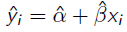
This formula represents linear regression where
<br>
*$y_{i}$* represents estimated sales for onservation *i*
<br>
*α* - estimated intercept coefficient
<br>
*β* - estimated rating coefficient
<br>
*$x_{i}$* - x value for observation *i*

In [13]:
pd.to_numeric(amazon_df['rating'])

0        4.5
1        4.4
2        4.3
3        4.4
4        4.4
        ... 
31607    4.4
31608    4.3
31609    4.4
31610    4.4
31611    4.4
Name: rating, Length: 31612, dtype: float64

In [14]:
#creating a separate dataframe containing product name, its rating, and its sales
sales_rating = amazon_df.groupby(['product_name', 'rating']).size().reset_index(name='sales')
sales_rating

,product_name,rating,sales
0,Calvin Klein Underwear Women's Carousel 3 Pack...,3.5,5
1,Calvin Klein Underwear Women's Carousel 3 Pack...,3.6,33
2,Calvin Klein Underwear Women's Carousel 3 Pack...,3.8,8
3,Calvin Klein Women's 3 Pack Carousel Thong Panty,4.7,118
4,Calvin Klein Women's 3 Pack Invisibles Hipster...,3.8,12
...,...,...,...
124,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,4.2,79
125,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,4.3,2305
126,b.tempt'd by Wacoal Women's Lace Kiss Bralette,4.0,211
127,b.tempt'd by Wacoal Women's Lace Kiss Thong Panty,4.4,242


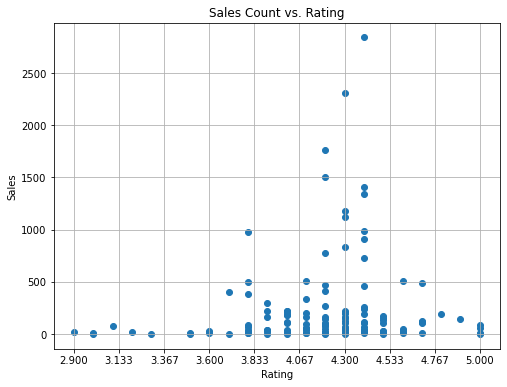

In [15]:
#visualizing data for the preliminary analysis using the scatter plot
sales_rating['rating'] = sales_rating['rating'].astype(float)
unique_rating = sales_rating['rating'].unique()
tick_positions = np.linspace(min(unique_rating), max(unique_rating), 10)
plt.figure(figsize=(8, 6))
plt.scatter(sales_rating['rating'],sales_rating['sales'])
plt.xticks(tick_positions)
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.title('Sales Count vs. Rating')
plt.grid(True);

In [16]:
#performing the linear regression analysis
slope_lin_r, intercept_lin_r, r_value_lin_r, p_value_lin_r, std_err_lin_r = stats.linregress(sales_rating['rating'], sales_rating['sales'])

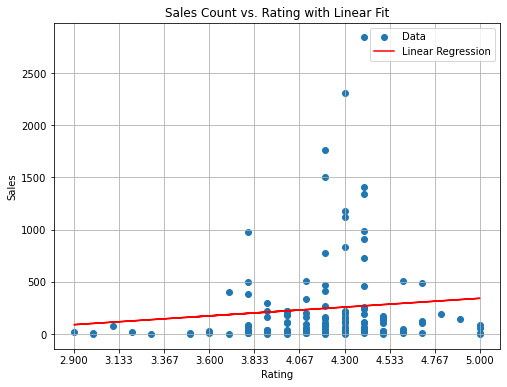

In [17]:
#plotting the linear fit against the data
plt.figure(figsize=(8, 6))
plt.scatter(sales_rating['rating'], sales_rating['sales'], label='Data')
plt.plot(sales_rating['rating'], slope_lin_r*sales_rating['rating']+intercept_lin_r, color='red', label='Linear Regression')
plt.xticks(tick_positions)
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Count vs. Rating with Linear Fit')
plt.grid(True);

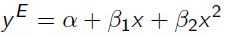
This formula represents quadratic polynomial regression where
<br>
*$y^{E}$* stands for estimated sales
<br>
*α* - estimated intercept coefficient
<br>
*$β_{1}$* - estimated coefficient for x (no meaning)
<br>
*$β_{2}$* - estimated rating coefficient

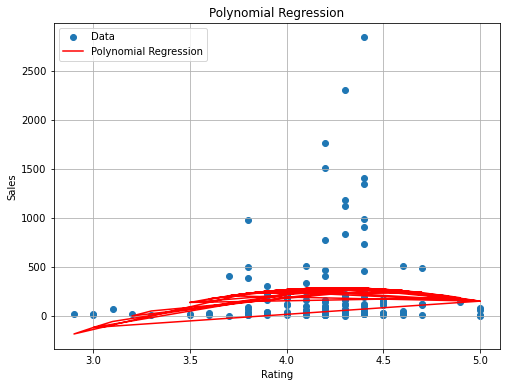

In [18]:
#performing the polynomial regression analysis
X = sales_rating['rating'].values.reshape(-1, 1) #independent variable
y = sales_rating['sales'].values #dependent variable

degree = 2 #quadratic polynomial regression

#generating polynomial features from the independent variable
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
#fitting a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
#generating predicted values of the dependent variable
y_pred = poly_reg.predict(X_poly)

#visualizing the polynomial regression against the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.legend()
plt.title('Polynomial Regression')
plt.grid(True);

In [19]:
#calculating polynomial regression coefficients, intercept, R-squared, standard errors, and p-value
coefficients_pol_r = poly_reg.coef_
intercept_pol_r = poly_reg.intercept_
r_squared_pol_r = r2_score(y, y_pred)
X_poly_with_constant = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly_with_constant).fit()
p_value_pol_r = model.pvalues[-1]
std_err_poly_r = model.bse

In [20]:
#comparing results from two regression models in the dataframe
results_rating = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Intercept': [intercept_lin_r, intercept_pol_r],
    'Coefficient': [slope_lin_r, coefficients_pol_r[-1]],
    'R-squared': [r_value_lin_r**2, r_squared_pol_r],
    'Standard Error': [std_err_lin_r, std_err_poly_r[-1]],
    'P-value': [p_value_lin_r, p_value_pol_r],
})

In [21]:
results_rating

,Model,Intercept,Coefficient,R-squared,Standard Error,P-value
0,Linear Regression,-258.421391,120.207957,0.011162,100.396017,0.233405
1,Polynomial Regression,-4292.017486,-251.342208,0.032461,150.917293,0.098311


According to this analysis, both linear and quadratic regressions produce statistically *insignificant* coefficients (at 0.05 significance level), meaning that there is no proven correlation between rating and corresponding sales.

# (3) The most successful brands

In [22]:
#creating a separate dataframe containing brand name and its sales
sales_brands = amazon_df.groupby(['brand_name']).size().reset_index(name='sales')
sales_brands = sales_brands.drop(sales_brands[sales_brands.index>10].index)
sales_brands

,brand_name,sales
0,Calvin-Klein,7372
1,Compression-Comfort,1
2,Creative-Motion,1
3,Fila,1
4,Hanky-Panky,582
5,Lucky-Brand,1
6,Nintendo,1
7,Sexy-Hair,1
8,Victorias-Secret,67
9,Wacoal,20088


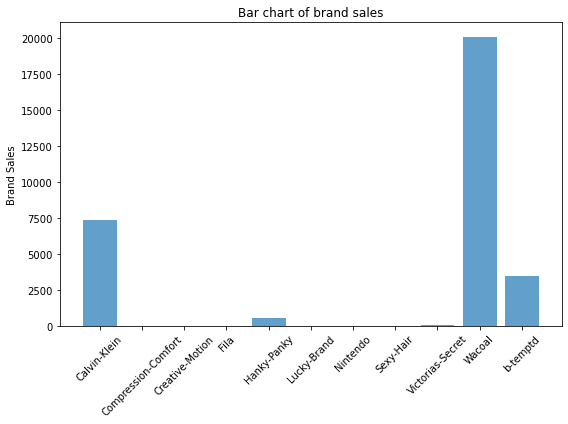

In [23]:
#visualizing the brand ranking in the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sales_brands['brand_name'], sales_brands['sales'], alpha=0.7)
plt.title('Bar chart of brand sales')
plt.ylabel('Brand Sales')
plt.xticks(rotation=45)
plt.tight_layout();

It appears as the most successful brand on Amazon.com in terms of sales is Wacoal, accounting for more than 20,000 sales for the indicated period. The second and third most successful brands are Calvin-Klein and b-temptd with 7,372 and 3,490 sales, respectively, on the website between June and July.

# (4) The most successful colors

In [24]:
#creating a separate dataframe containing color name and its sales
sales_color = amazon_df.groupby(['color']).size().reset_index(name='sales')
sales_color = sales_color.drop(sales_color[sales_color.sales<100].index)
sales_color = sales_color.drop(sales_color[sales_color['color'].isin(('Small', 'Medium', 'Large'))].index)
sales_color

,color,sales
1,Almond Blossom,442
3,Au Natural,190
5,Baja Blue,201
6,Bare,954
8,Black,5664
31,Blithe,140
34,Blue Depths/Sharp Green,134
41,Blue Turquoise,247
44,Bridal White,205
45,Bronzed,167


C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\376125975.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtick_labels)


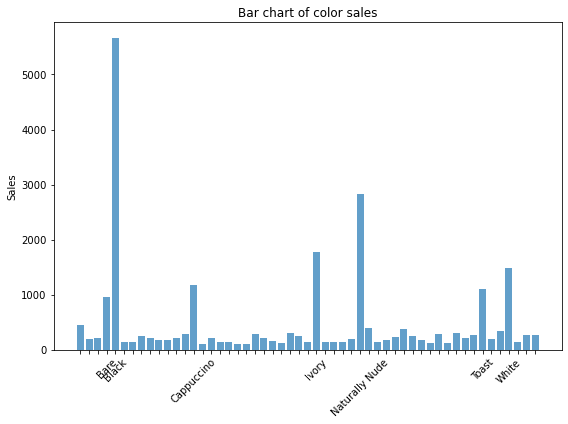

In [25]:
#visualizing the color ranking in the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sales_color['color'], sales_color['sales'], alpha=0.7)
plt.title('Bar chart of color sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
xtick_labels = [color if meets_condition else '' for color, meets_condition in zip(sales_color['color'], (sales_color['sales']>500))]
plt.gca().set_xticklabels(xtick_labels)
plt.tight_layout();

It appears as the most successful color on Amazon.com in terms of sales is Black, accounting for more than 5,500 sales for the indicated period. The second and third most successful colors are Naturally Nude and Ivory with 2,825 and 1,778 sales, respectively, on the website between June and July.

# (5) The most successful retail platforms

In [26]:
#creating a separate dataframe containing retail platform and its sales
sales_platforms = pd.DataFrame(columns=['Retail platform', 'Sales'])
#appending sales data for ae.com to the sales_platforms dataframe
ae_df = pd.read_csv('ae_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'ae_com', 'Sales': len(ae_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\699386765.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'ae_com', 'Sales': len(ae_df)}, ignore_index=True)


In [27]:
#appending sales data for btemptd.com to the sales_platforms dataframe
btemptd_df = pd.read_csv('btemptd_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'btemptd_com', 'Sales': len(btemptd_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\1516354998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'btemptd_com', 'Sales': len(btemptd_df)}, ignore_index=True)


In [28]:
#appending sales data for calvinklein.com to the sales_platforms dataframe
calvinklein_df = pd.read_csv('calvinklein_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'calvinklein_com', 'Sales': len(calvinklein_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\2032466755.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'calvinklein_com', 'Sales': len(calvinklein_df)}, ignore_index=True)


In [29]:
#appending sales data for hankypanky.com to the sales_platforms dataframe
hankypanky_df = pd.read_csv('hankypanky_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'hankypanky_com', 'Sales': len(hankypanky_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\3879176417.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'hankypanky_com', 'Sales': len(hankypanky_df)}, ignore_index=True)


In [30]:
#appending sales data for macys.com to the sales_platforms dataframe
macys_df = pd.read_csv('macys_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'macys_com', 'Sales': len(macys_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\62161276.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'macys_com', 'Sales': len(macys_df)}, ignore_index=True)


In [31]:
#appending sales data for shop-nordstorm.com to the sales_platforms dataframe
nordstrom_df = pd.read_csv('shop_nordstrom_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'shop_nordstrom_com', 'Sales': len(nordstrom_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\810109059.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'shop_nordstrom_com', 'Sales': len(nordstrom_df)}, ignore_index=True)


In [32]:
#appending sales data for us-topshop.com to the sales_platforms dataframe
ustopshop_df = pd.read_csv('us_topshop_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'us_topshop_com', 'Sales': len(ustopshop_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\73689784.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'us_topshop_com', 'Sales': len(ustopshop_df)}, ignore_index=True)


In [33]:
#appending sales data for vistoriassecret.com to the sales_platforms dataframe
victoriassecret_df = pd.read_csv('victoriassecret_com.csv')
sales_platforms = sales_platforms.append({'Retail platform': 'victoriassecret_com', 'Sales': len(victoriassecret_df)}, ignore_index=True)

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\1246305584.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'victoriassecret_com', 'Sales': len(victoriassecret_df)}, ignore_index=True)


In [34]:
#appending sales data for amazon.com to the sales_platforms dataframe
sales_platforms = sales_platforms.append({'Retail platform': 'amazon_com', 'Sales': len(amazon_df)}, ignore_index=True)
sales_platforms

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_7516\120684827.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_platforms = sales_platforms.append({'Retail platform': 'amazon_com', 'Sales': len(amazon_df)}, ignore_index=True)


,Retail platform,Sales
0,ae_com,28328
1,btemptd_com,3518
2,calvinklein_com,4747
3,hankypanky_com,35005
4,macys_com,40897
5,shop_nordstrom_com,12568
6,us_topshop_com,3082
7,victoriassecret_com,453386
8,amazon_com,31612


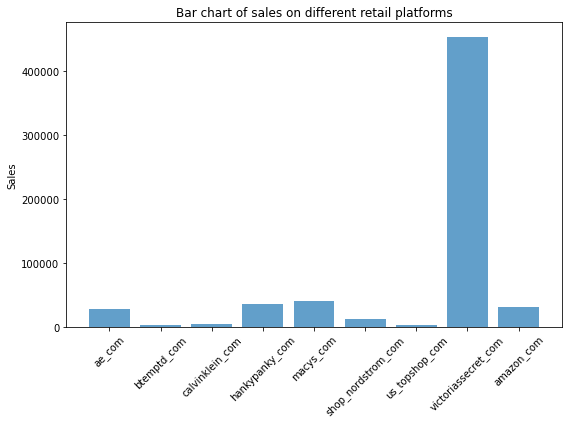

In [35]:
#visualizing the retail platform ranking in the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sales_platforms['Retail platform'], sales_platforms['Sales'], alpha=0.7)
plt.title('Bar chart of sales on different retail platforms')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout();

It appears as the most successful retail platform in terms of innerwear sales is Victoria's Secret website, accounting for more than 450,00 sales for the indicated period. The second and third most successful platforms are Macys.com and Hankypanky.com with 40,897 and 35,005 sales, respectively, between June and July.

# (6) The logit and probit regression of high rating on price, color, and brand

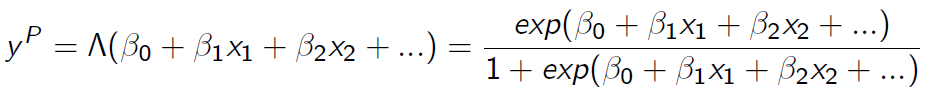
This formula corresponds tot he logit regression where
<br>
*$y^{P}$* represents estimated probability of high rating (>4.5)
<br>
*$β_{0}$* - estimated intercept coefficient
<br>
*$β_{k}$* - estimated coefficients for independent variables

In [36]:
#creating a separate dataframe containing colors with more than 500 sales on amazon.com
colors = sales_color[sales_color.sales>500]
colors

,color,sales
6,Bare,954
8,Black,5664
50,Cappuccino,1168
130,Ivory,1778
157,Naturally Nude,2825
234,Toast,1098
250,White,1480


In [37]:
#creating a separate dataframe with independent (rating) and dependent variables (price, color, and brand)
data_df = pd.DataFrame({'price':amazon_df.price, 'rating':amazon_df.rating, 'color':amazon_df.color, 'brand_name':amazon_df.brand_name})

In [38]:
#creating color columns for each sale with boolean values
for color in colors['color']:
    for i in range(len(data_df)):
        if data_df.loc[i,'color']==color: data_df.loc[i,color]=1
        else: data_df.loc[i,color]=0

In [39]:
#creating brand columns for each sale with boolean values
for brand in sales_brands['brand_name']:
    for i in range(len(data_df)):
        if data_df.loc[i,'brand_name']==brand: data_df.loc[i,brand]=1
        else: data_df.loc[i,brand]=0

In [40]:
#converting rating data into two categories: high rating, more than 4.5 (1) and low rating, less than 4.5 (0)
for i in range(len(data_df)):
    if data_df.loc[i,'rating']>=4.5: data_df.loc[i,'rating']=1
    else: data_df.loc[i,'rating']=0

In [41]:
data_df

,price,rating,color,brand_name,Bare,Black,Cappuccino,Ivory,Naturally Nude,Toast,...,Compression-Comfort,Creative-Motion,Fila,Hanky-Panky,Lucky-Brand,Nintendo,Sexy-Hair,Victorias-Secret,Wacoal,b-temptd
0,32.40,1.0,Bare,Calvin-Klein,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,0.0,Large,Wacoal,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,65.00,0.0,Black,Wacoal,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.00,0.0,Large,Hanky-Panky,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65.00,0.0,Pecan,Wacoal,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,65.00,0.0,Pecan,Wacoal,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31608,54.50,0.0,Teaberry/Gray,Wacoal,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31609,60.00,0.0,Violet Tulip,Wacoal,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31610,48.00,0.0,Ivory,Wacoal,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
#conducting a logistic regression
import statsmodels.api as sm

#independent variables
X = np.asarray(data_df[['price','Bare', 'Black', 'Cappuccino', 'Ivory', 'Naturally Nude', 'Toast', 'White', 'Calvin-Klein',
             'Compression-Comfort', 'Creative-Motion', 'Fila', 'Hanky-Panky', 'Lucky-Brand', 'Nintendo', 'Sexy-Hair', 'Victorias-Secret', 'Wacoal', 'b-temptd']], dtype=np.float64)
#dependent variable
y = np.asarray(data_df['rating'], dtype=np.float64)

#adding a constant to the independent variables (intercept)
X = sm.add_constant(X)

#fitting a logistic regression model
model_logit = sm.Logit(y, X)

#fitting the model
result_logit = model_logit.fit()

print(result_logit.summary())

         Current function value: 0.214644
         Iterations: 35


C:\Users\Akhmetova_Shynar\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31612
Model:                          Logit   Df Residuals:                    31592
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.2498
Time:                        17:58:20   Log-Likelihood:                -6785.3
converged:                      False   LL-Null:                       -9045.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4575      1.121      0.408      0.683      -1.739       2.654
x1            -0.0603      0.002    -31.204      0.000      -0.064      -0.057
x2             0.3530      0.086      4.093      0.0

For logit and probit models, we do **not** interpret coefficients. Instead, wetransform them into marginal differences (effects) for interpretation purposes.

In [57]:
marginal_effects_logit = result_logit.get_margeff()

# Display the marginal effects
print(marginal_effects_logit.summary())

# Extract the relevant information for a DataFrame
summary_data = {
    'Marginal_Effect': marginal_effects_logit.margeff,
    'Std_Error': marginal_effects_logit.margeff_se,
    'z': marginal_effects_logit.tvalues,
    'P_Value': marginal_effects_logit.pvalues,
}

# Create a DataFrame from the extracted information
marginal_effects_logit_df = pd.DataFrame(summary_data)
marginal_effects_logit_df.index = ['price','Bare', 'Black', 'Cappuccino', 'Ivory', 'Naturally Nude', 'Toast', 'White', 'Calvin-Klein', 'Compression-Comfort', 'Creative-Motion', 'Fila', 'Hanky-Panky', 'Lucky-Brand', 'Nintendo', 'Sexy-Hair', 'Victorias-Secret', 'Wacoal', 'b-temptd']
# Print the marginal effects DataFrame
print(marginal_effects_logit_df)

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0038      0.000    -32.117      0.000      -0.004      -0.004
x2             0.0222      0.005      4.091      0.000       0.012       0.033
x3            -0.0322      0.004     -7.879      0.000      -0.040      -0.024
x4            -0.1057      0.019     -5.683      0.000      -0.142      -0.069
x5            -0.0663      0.013     -5.141      0.000      -0.092      -0.041
x6            -0.1632      0.020     -8.043      0.000      -0.203      -0.123
x7            -0.0794      0.015     -5.466      0.000      -0.108      -0.051
x8            -0.0664      0.009     -7.671      0.000      -0.083      -0.049
x9             0.0144      0.071      0.205      0.838    

It appears that our logistic regression explains approximately 25% of variation within the data, according to the produced pseudo R-squared. It is also evident that generated coefficients for price and colors are statistically significant (extremely small p-values and confidence intervals do not include 0), while coefficients for brands are mostly not.

We can interpret the price coefficient the following way:
*The probability of high rating (>4.5) of the innerwear product is expected to be lower by approximately 0.38 percentage points, on average, for the increase in price by $1, controlling for other variables.*

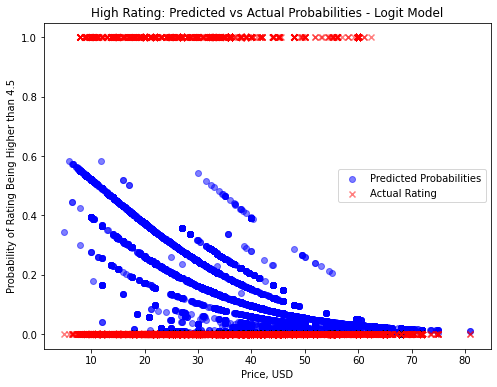

In [58]:
#predicting the probabilities using the logistic regression model
pred_probs_logit = result_logit.predict(X)
#visualizing predicted probabilities vs actual values of high rating
plt.figure(figsize=(8, 6))
plt.scatter(X[:,1], pred_probs_logit, color='blue', label='Predicted Probabilities', alpha=0.5)
plt.scatter(X[:,1], y, color='red', marker='x', label='Actual Rating', alpha=0.5)
plt.xlabel('Price, USD')
plt.ylabel('Probability of Rating Being Higher than 4.5')
plt.title('High Rating: Predicted vs Actual Probabilities - Logit Model')
plt.legend();

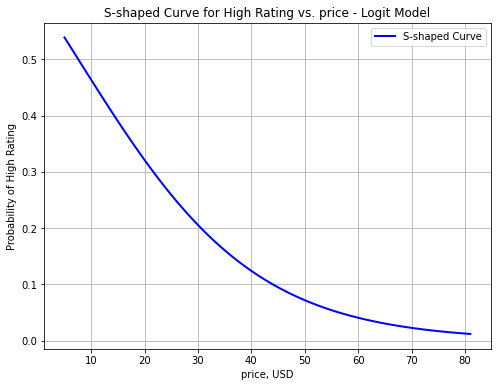

In [59]:
#choosing the independent variable to focus on
independent_variable='price'

price_values = X[:, 1]

#generating a range of values for the chosen independent variable
x_range = np.linspace(price_values.min(), price_values.max(), 100)

#creating a meshgrid with fixed values for the other independent variables
X_pred = np.zeros((len(x_range), X.shape[1]))
X_pred[:, 0] = 1  #setting the constant term
X_pred[:, 1] = x_range  #setting the chosen independent variable

#predicting the probabilities using the logistic regression model
y_pred_logit = result_logit.predict(X_pred)

#plotting the S-shaped curve for the chosen independent variable
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_pred_logit, color='blue', label='S-shaped Curve', linewidth=2)
plt.xlabel(independent_variable+', USD')
plt.ylabel('Probability of High Rating')
plt.title(f'S-shaped Curve for High Rating vs. {independent_variable} - Logit Model')
plt.legend()
plt.grid(True);

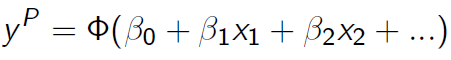
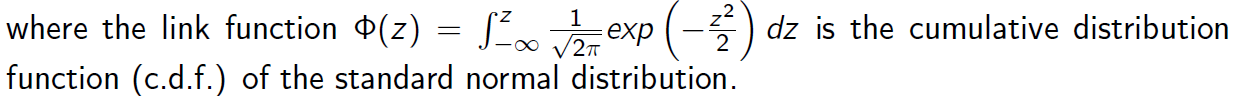
This formula corresponds to the probit regression where
<br>
*$y^{P}$* represents estimated probability of high rating (>4.5)
<br>
*$β_{0}$* - estimated intercept coefficient
<br>
*$β_{k}$* - estimated coefficients for independent variables

In [61]:
#conducting a probit regression
#fitting a probit regression model
import statsmodels.api as sm
model_probit = sm.Probit(y, X)

#fitting the model
result_probit = model_probit.fit()

print(result_probit.summary())

         Current function value: 0.214171
         Iterations: 35


C:\Users\Akhmetova_Shynar\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                31612
Model:                         Probit   Df Residuals:                    31592
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.2515
Time:                        19:14:57   Log-Likelihood:                -6770.4
converged:                      False   LL-Null:                       -9045.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0911      0.630      0.145      0.885      -1.144       1.327
x1            -0.0310      0.001    -31.166      0.000      -0.033      -0.029
x2             0.1305      0.050      2.611      0.0

In [62]:
#from statsmodels.discrete.discrete_margins import get_margeff
marginal_effects_probit = result_probit.get_margeff()

# Display the marginal effects
print(marginal_effects_probit.summary())

# Extract the relevant information for a DataFrame
summary_data = {
    'Marginal_Effect': marginal_effects_probit.margeff,
    'Std_Error': marginal_effects_probit.margeff_se,
    'z': marginal_effects_probit.tvalues,
    'P_Value': marginal_effects_probit.pvalues,
}

# Create a DataFrame from the extracted information
marginal_effects_probit_df = pd.DataFrame(summary_data)
marginal_effects_probit_df.index = ['price','Bare', 'Black', 'Cappuccino', 'Ivory', 'Naturally Nude', 'Toast', 'White', 'Calvin-Klein', 'Compression-Comfort', 'Creative-Motion', 'Fila', 'Hanky-Panky', 'Lucky-Brand', 'Nintendo', 'Sexy-Hair', 'Victorias-Secret', 'Wacoal', 'b-temptd']
# Print the marginal effects DataFrame
print(marginal_effects_probit_df)

       Probit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0036      0.000    -31.519      0.000      -0.004      -0.003
x2             0.0152      0.006      2.609      0.009       0.004       0.027
x3            -0.0362      0.004     -9.277      0.000      -0.044      -0.029
x4            -0.0783      0.013     -5.977      0.000      -0.104      -0.053
x5            -0.0477      0.009     -5.063      0.000      -0.066      -0.029
x6            -0.1177      0.013     -9.186      0.000      -0.143      -0.093
x7            -0.0590      0.011     -5.557      0.000      -0.080      -0.038
x8            -0.0738      0.008     -9.043      0.000      -0.090      -0.058
x9             0.0220      0.073      0.300      0.764    

It appears that our probit regression explains approximately 25.15% of variation within the data, according to the produced pseudo R-squared. It is also evident that generated coefficients for price and colors are statistically significant (extremely small p-values and confidence intervals do not include 0), while coefficients for brands are mostly not.

We can interpret the price coefficient the following way:
*The probability of high rating (>4.5) of the innerwear product is expected to be lower by approximately 0.36 percentage points, on average, for the increase in price by $1, controlling for other variables.*

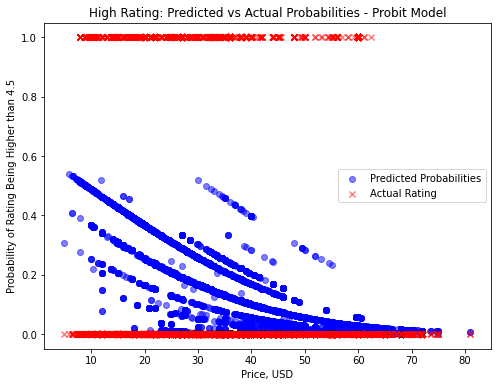

In [63]:
#predicting the probabilities using the probit regression model
pred_probs_probit = result_probit.predict(X)
#visualizing predicted probabilities vs actual values of high rating
plt.figure(figsize=(8, 6))
plt.scatter(X[:,1], pred_probs_probit, color='blue', label='Predicted Probabilities', alpha=0.5)
plt.scatter(X[:,1], y, color='red', marker='x', label='Actual Rating', alpha=0.5)
plt.xlabel('Price, USD')
plt.ylabel('Probability of Rating Being Higher than 4.5')
plt.title('High Rating: Predicted vs Actual Probabilities - Probit Model')
plt.legend();

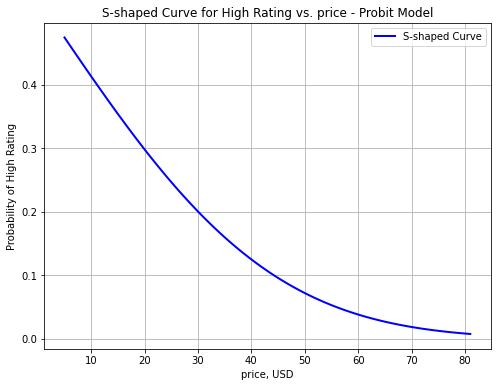

In [64]:
#predicting the probabilities using the probit regression model
y_pred_probit = result_probit.predict(X_pred)

#plotting the S-shaped curve for the chosen independent variable
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_pred_probit, color='blue', label='S-shaped Curve', linewidth=2)
plt.xlabel(independent_variable+', USD')
plt.ylabel('Probability of High Rating')
plt.title(f'S-shaped Curve for High Rating vs. {independent_variable} - Probit Model')
plt.legend()
plt.grid(True);

# Conclusions
With some confidence we can claim that there is correlation between rating and price (inverse relatiosnhip) and very small positive correlation between sales and price. We also found out that Top-3 brands in terms of sales for June-July 2017 are Wacoal, Calvin-Klein, and b-temptd. Top-3 colors are Black, Naturally Nude, and Ivory. Lastly, Top-3 retail platforms for innerwear items are Victoriassecret.com, Macys.com, and Hankypanky.com.